In [12]:
#GirishK 21BCE1152 Assignment-3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
#importing the dataset
dataset = pd.read_csv('penguins_size.csv')
dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [14]:
#check for null values
print(dataset.isnull().sum())
#no columns have null values 
#check for duplicate rows
print(dataset.duplicated().sum())
#check for duplicate columns
print(dataset.T.duplicated().sum())
#check for constant columns
print(dataset.columns[dataset.nunique()==1])
#check for constant rows
print(dataset[dataset.nunique(axis=1)==1])
#convert all categorical data to numerical data
dataset['species'] = dataset['species'].map({'Adelie':0,'Chinstrap':1,'Gentoo':2})
#convert island to numerical data
dataset['island'] = dataset['island'].map({'Torgersen':0,'Biscoe':1,'Dream':2})
#convert sex to numerical data
dataset['sex'] = dataset['sex'].map({'MALE':0 , 'FEMALE':1})


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
0
0
Index([], dtype='object')
Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


<Axes: xlabel='island', ylabel='count'>

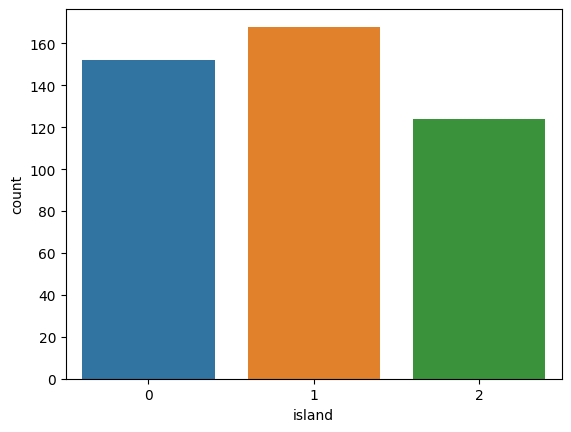

In [15]:
#perform uni-variate analysis
sns.countplot(x='species',data=dataset)
sns.countplot(x='island',data=dataset)

c:\Users\giris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\giris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


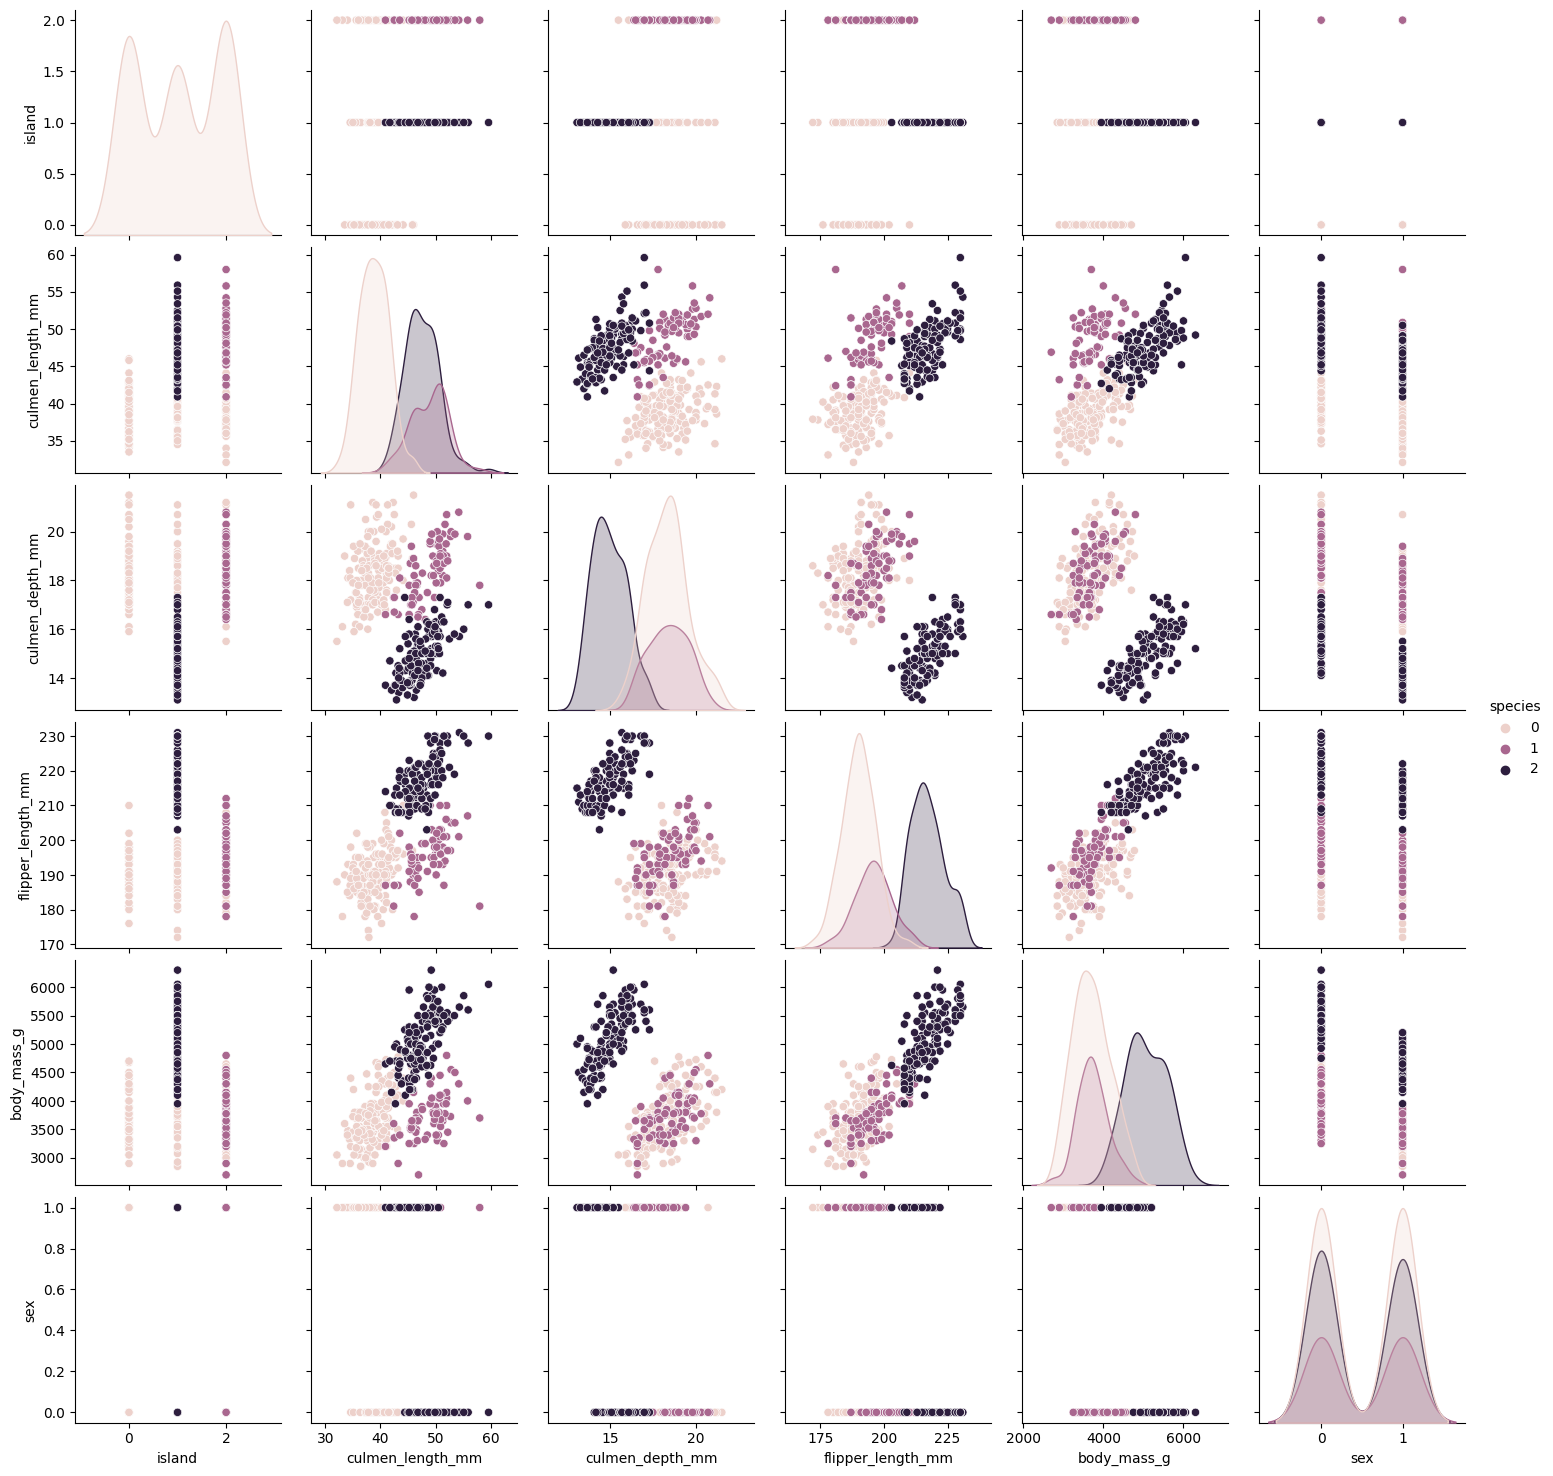

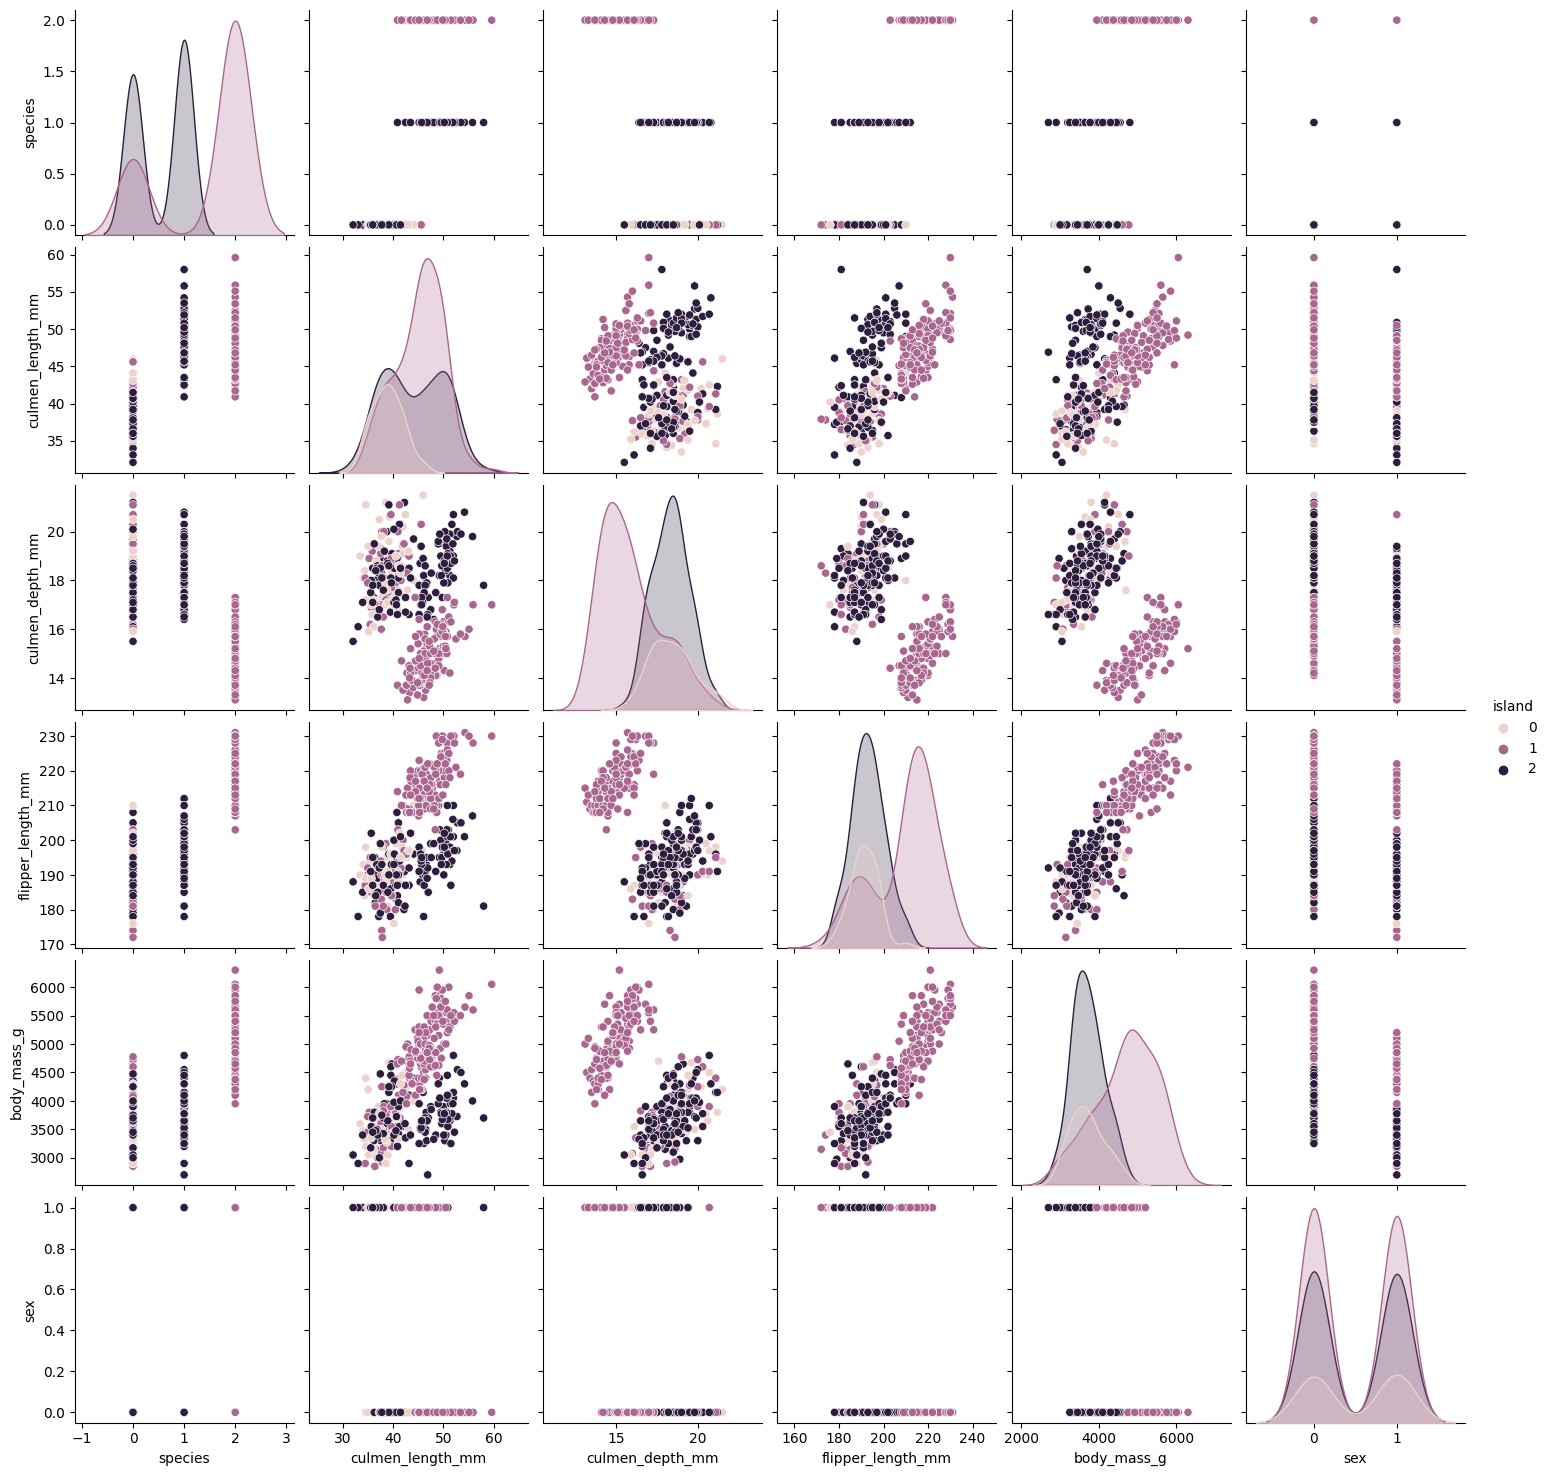

In [16]:
#perform bi-variate analysis
sns.pairplot(dataset,hue='species')
sns.pairplot(dataset,hue='island')

c:\Users\giris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


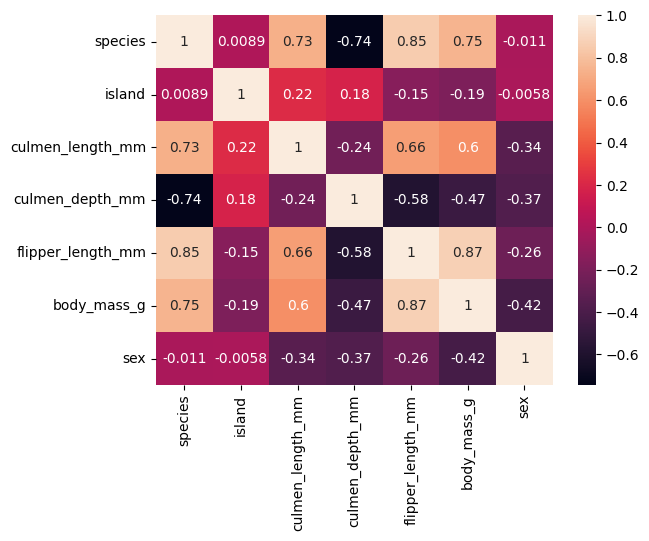

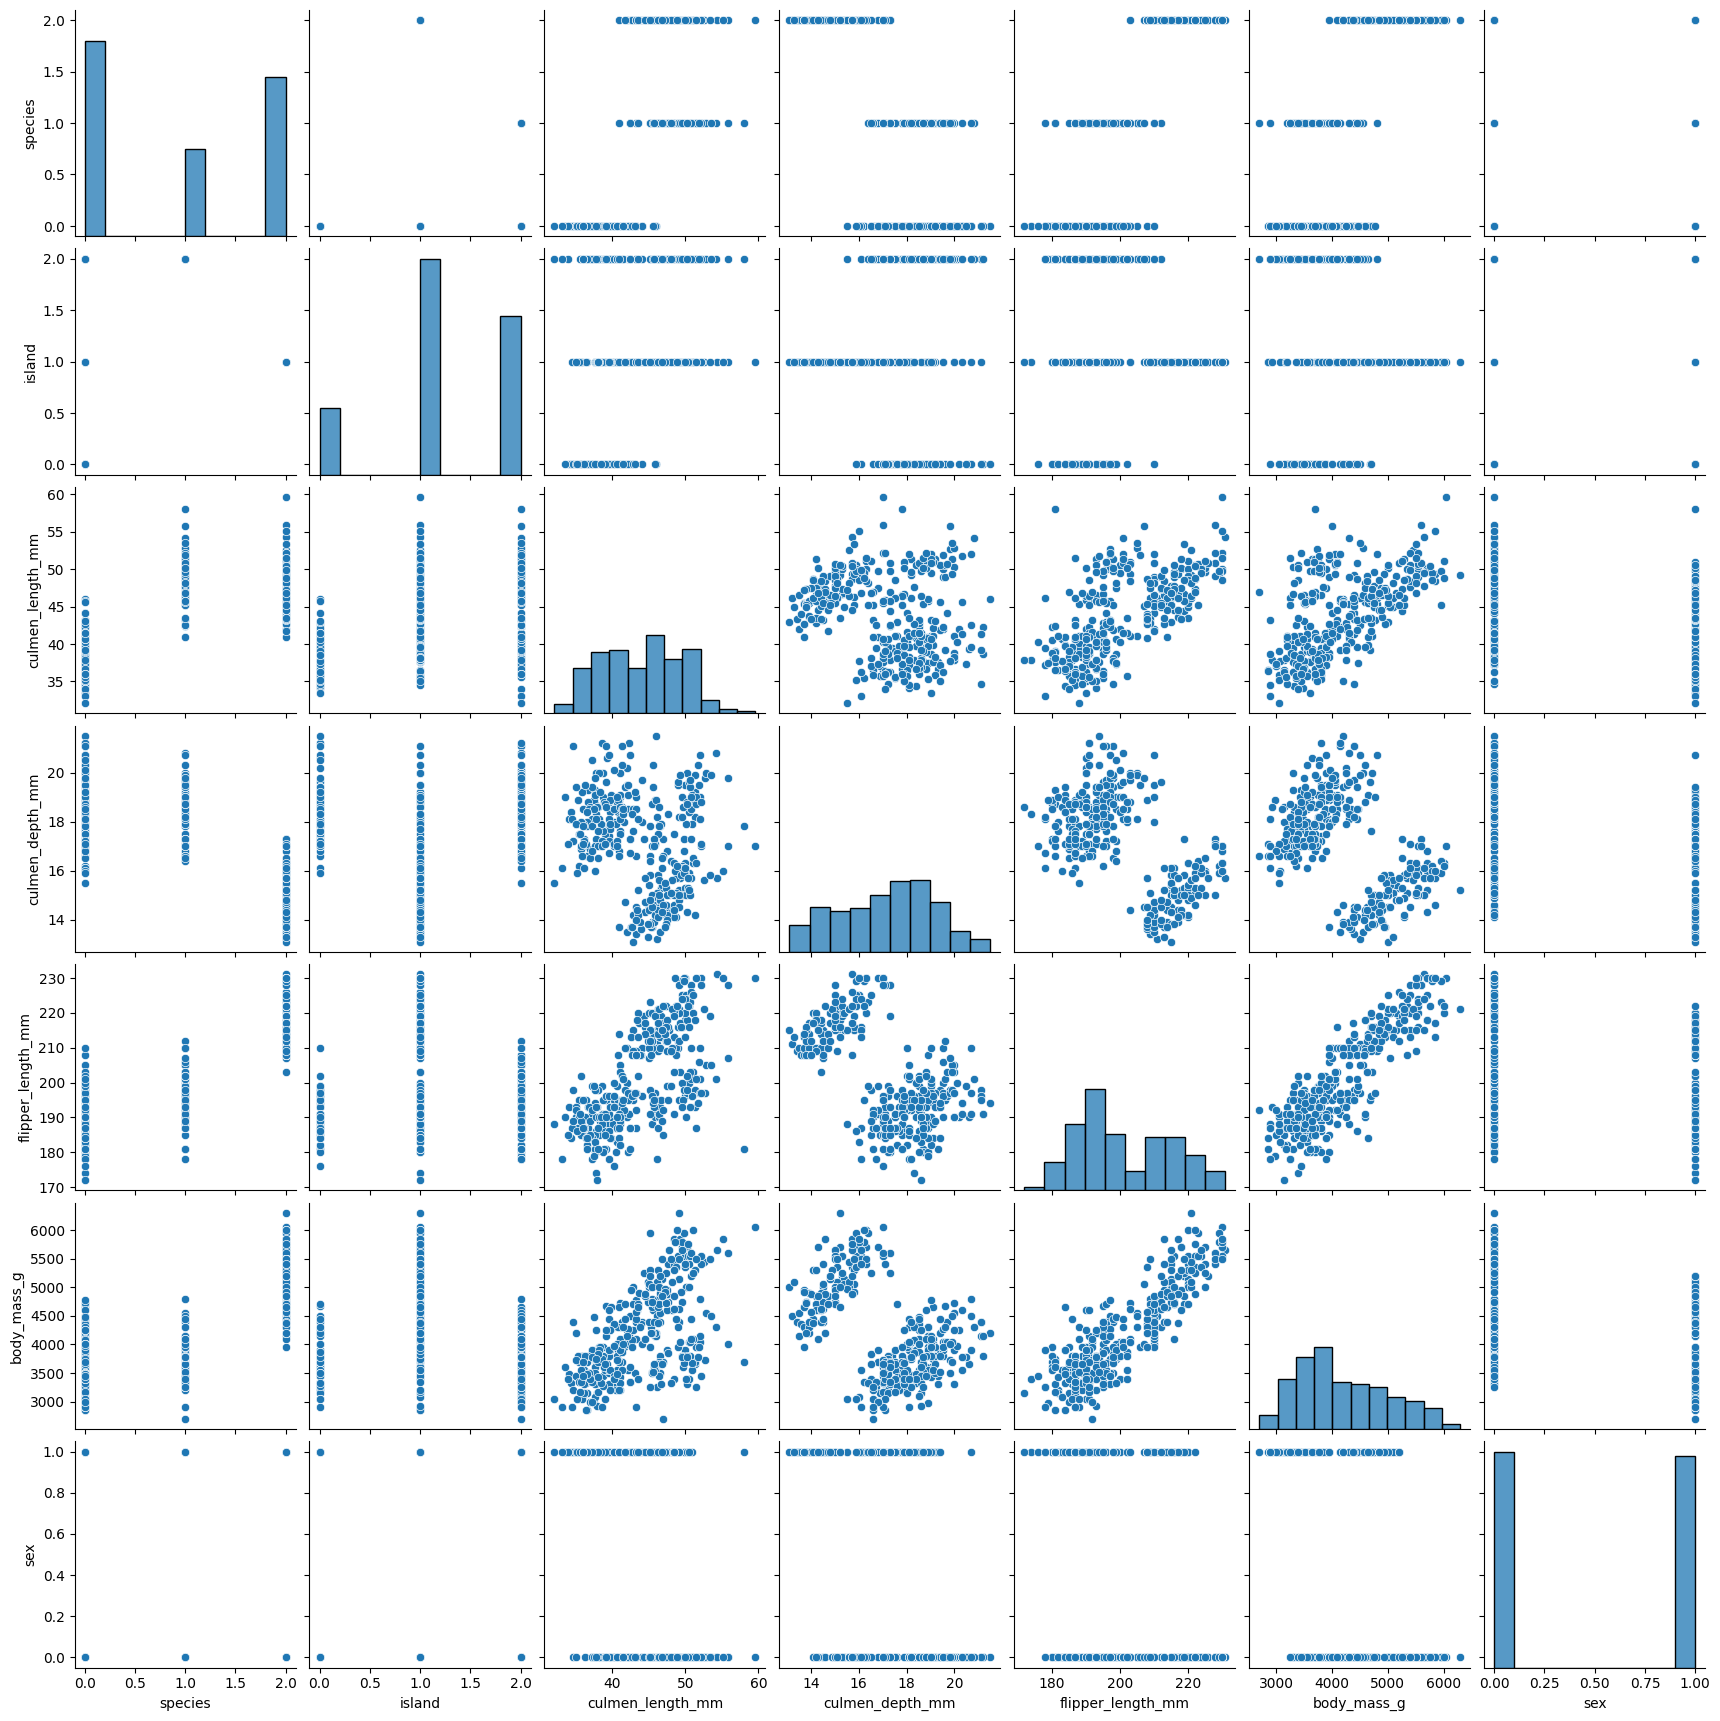

In [21]:
#perform multi-variate analysis
sns.heatmap(dataset.corr(),annot=True)
#perform another multi-variate analysis without heatmap
sns.pairplot(dataset)

In [23]:
#dataset has null values in 5 columns
#columns culmen length (mm) and culmen depth (mm) have 2 null values each
#we can replace them with mean values
dataset['culmen_length_mm'].fillna(dataset['culmen_length_mm'].mean(),inplace=True)
#dataset['culmen_length_mm'].isnull().sum()
#flipper_length_mm and body_mass_g have 2 null values each
#we can replace them with mean values
dataset['flipper_length_mm'].fillna(dataset['flipper_length_mm'].mean(),inplace=True)
#sex is categorical data and has 10 null values
#we can replace them with mode values
#describe the dataset
dataset.describe()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,344.000000,342.000000,344.000000,342.000000,333.000000
mean,0.918605,1.209302,43.921930,17.151170,200.915205,4201.754386,0.495495
std,0.893320,0.684970,5.443643,1.974793,14.020657,801.954536,0.500732
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,1.000000,39.275000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,1.000000,44.250000,17.300000,197.000000,4050.000000,0.000000
75%,2.000000,2.000000,48.500000,18.700000,213.000000,4750.000000,1.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


<Axes: xlabel='body_mass_g'>

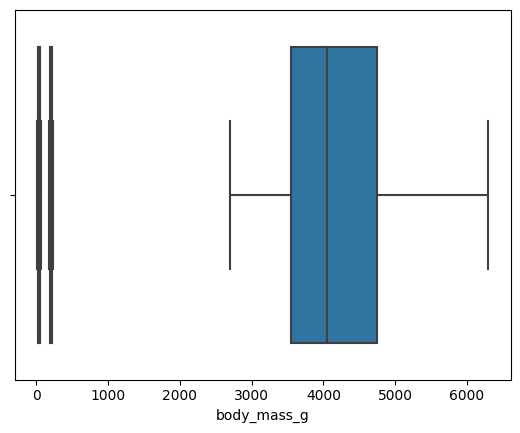

In [25]:
#find outliers in the dataset
#boxplot for culmen_length_mm
sns.boxplot(x=dataset['culmen_length_mm'])
#boxplot for culmen_depth_mm
sns.boxplot(x=dataset['culmen_depth_mm'])
#boxplot for flipper_length_mm
sns.boxplot(x=dataset['flipper_length_mm'])
#boxplot for body_mass_g
sns.boxplot(x=dataset['body_mass_g'])


In [27]:
#replace outliers with mean values
#culmen_length_mm
dataset['culmen_length_mm'] = np.where(dataset['culmen_length_mm']>50,dataset['culmen_length_mm'].mean(),dataset['culmen_length_mm'])
#culmen_depth_mm
dataset['culmen_depth_mm'] = np.where(dataset['culmen_depth_mm']>25,dataset['culmen_depth_mm'].mean(),dataset['culmen_depth_mm'])
#flipper_length_mm
dataset['flipper_length_mm'] = np.where(dataset['flipper_length_mm']>230,dataset['flipper_length_mm'].mean(),dataset['flipper_length_mm'])
#body_mass_g
dataset['body_mass_g'] = np.where(dataset['body_mass_g']>6000,dataset['body_mass_g'].mean(),dataset['body_mass_g'])


In [29]:
#check correlation of independent variables with target variable
#here independent variable is species
dataset.corr()['species'].sort_values(ascending=False)
#check correlation of independent variables with each other
dataset.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,0.008864,0.772193,-0.744076,0.849323,0.746507,-0.010964
island,0.008864,1.000000,0.135793,0.179753,-0.143807,-0.187970,-0.005834
culmen_length_mm,0.772193,0.135793,1.000000,-0.398866,0.658667,0.612879,-0.218821
culmen_depth_mm,-0.744076,0.179753,-0.398866,1.000000,-0.583180,-0.472364,-0.372673
flipper_length_mm,0.849323,-0.143807,0.658667,-0.583180,1.000000,0.856008,-0.250515
body_mass_g,0.746507,-0.187970,0.612879,-0.472364,0.856008,1.000000,-0.418046
sex,-0.010964,-0.005834,-0.218821,-0.372673,-0.250515,-0.418046,1.000000


In [34]:
#already performed label encoding converting categorical data to numerical data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 18.9 KB


In [41]:
#splitting the dataset into dependent and independent variables
X = dataset.iloc[:,1:7].values
y = dataset.iloc[:,0].values

#scale the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
Y = sc.fit_transform(y.reshape(-1,1))
#splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
#check training and testing set shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#visualise the training and testing set
print(X_train)
print(X_test)
print(y_train)
print(y_test)

(258, 6)
(86, 6)
(258,)
(86,)
[[ 1.15603468 -2.50845328 -0.83734789 -0.92248098 -1.45011551  1.00904996]
 [-0.30600918  0.82261346 -1.3951844   0.94725514  0.58475067         nan]
 [ 1.15603468  0.2844288   0.68402441  0.01238708  0.3303924  -0.99103121]
 ...
 [-0.30600918  0.2844288  -0.43164861  1.37873271  2.30166902 -0.99103121]
 [ 1.15603468  0.2844288   0.633312   -0.05952585 -1.00498854  1.00904996]
 [-0.30600918  0.96436098 -0.53307343  1.01916807  1.66577333 -0.99103121]]
[[ 1.15603468 -0.83110761  2.00254707 -0.34717756 -0.05114501 -0.99103121]
 [-0.30600918 -0.33499129  2.00254707 -0.41909048  0.26680283 -0.99103121]
 [ 1.15603468 -1.27997476 -0.17808656 -0.63482927 -1.51370508  1.00904996]
 [-0.30600918  1.27148061 -1.04019753  0.5876905   1.66577333 -0.99103121]
 [-0.30600918  0.42099549 -1.24304717  0.94725514  0.83910895  1.00904996]
 [-1.76805304  0.0430021   0.22761272 -0.34717756  0.64834024 -0.99103121]
 [ 1.15603468 -0.38224046  0.48117477  0.30003879  0.13962369 -0